## 1. Installation and Setup -- I didnt configure GPU so the code will probably run a bit slow 

In [2]:
!pip install opencv-python matplotlib

In [3]:
!pip install tensorflow

In [4]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-pro

In [5]:
import tensorflow as tf
import os

In [6]:
#stps tensorflow from taking all the vram on your gpu
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus :
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
tf.config.experimental.list_physical_devices('GPU')

[]

## 2. Removing Dodgy Images 

In [14]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\user\AppData\Local\Temp\ipykernel_16432\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [15]:
data_dir ='data'

In [16]:
file_types = ['jpeg','jpg','png','bmp']

In [17]:
#Explocation des commandes dans la cellule apres celle-ci 
print(os.listdir(data_dir))
sub_dir1 = os.listdir(data_dir)[0]
sub_dir2 = os.listdir(data_dir)[1]
print(os.path.join(data_dir, sub_dir1))
print(os.path.join(data_dir, sub_dir2))

['happy', 'sad']
data\happy
data\sad


In [22]:
"""img = cv2.imread(image_path) """# lire une image a partir d'un path en tq tableau NumPy . If success , img will contain data sous forme matricielle.sinn img=None.
"""tip = imghdr.what(image_path) """ #retourne le type de fichier en chaine de caractere 

'tip = imghdr.what(image_path) '

In [24]:
img = cv2.imread(os.path.join('data','happy','154006829.jpg'))

In [26]:
print(img.shape ,'image has' , img.shape[0],' rows of pixels, ', img.shape[1],' colonnes of pixels, ',img.shape[2],' channels ( rgb maneha) .')

(3744, 5616, 3) image has 3744  rows of pixels,  5616  colonnes of pixels,  3  channels ( rgb maneha) .


In [28]:
type(img) 

numpy.ndarray

In [30]:
print(img)

[[[ 12  29  32]
  [ 10  29  32]
  [  9  28  31]
  ...
  [  1  23  18]
  [  3  24  21]
  [  3  21  20]]

 [[ 19  31  35]
  [ 15  30  33]
  [ 18  35  38]
  ...
  [  0  23  18]
  [ 10  24  22]
  [  0  21  18]]

 [[ 17  32  35]
  [ 15  27  31]
  [ 22  37  40]
  ...
  [  3  17  13]
  [  1  20  17]
  [  3  22  19]]

 ...

 [[155  99 212]
  [152  90 210]
  [159 101 209]
  ...
  [ 82 114 149]
  [ 88 121 154]
  [ 96 129 162]]

 [[157 102 211]
  [151  90 210]
  [159 100 212]
  ...
  [ 85 120 153]
  [ 89 123 153]
  [ 92 126 156]]

 [[158 100 209]
  [148  90 208]
  [153  97 210]
  ...
  [ 82 116 152]
  [ 82 116 152]
  [ 86 118 153]]]


the color is weird because opencv reads an image in bgr , here's a fix


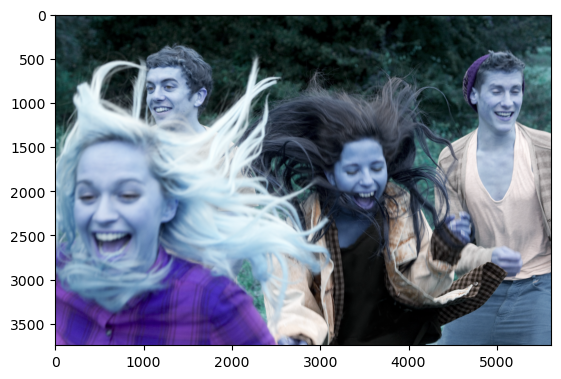

In [32]:
plt.imshow(img) 
print ("the color is weird because opencv reads an image in bgr , here's a fix" )

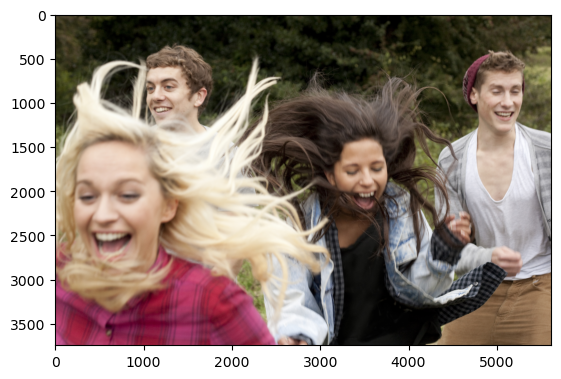

In [33]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #-> convert color of img from bgr to rbg 

In [34]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in file_types : 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            None 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

## 3. Load Data

In [38]:
import numpy as np 
from matplotlib import pyplot as plt

In [39]:
data = tf.keras.utils.image_dataset_from_directory('data')
print(type(data))
#Fonction : Charger des images à partir d'un répertoire en les organisant sous forme de dataset TensorFlow . 
#Ce dataset est un objet itérable, composé de tuples (image, label), où :
    #image : Est une représentation tensorielle d'une image (par défaut, redimensionnée en (256, 256, 3) pour les images en couleur RGB).
    #label : Est un entier représentant l'indice de la classe auquel appartient l'image (par exemple : 0 pour la première classe, 1 pour la deuxième, etc.).
    #par classe on veut dire subdirecotry in data directory : \sad -> classe1 , \happy -> classe2 

Found 305 files belonging to 2 classes.
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [41]:
#Convertir un dataset TensorFlow en un itérateur qui renvoie des données sous forme de tableaux NumPy.
data_iterator = data.as_numpy_iterator()
print(type(data_iterator))

<class 'tensorflow.python.data.ops.dataset_ops.NumpyIterator'>


In [45]:
batch = data_iterator.next() # -> the batch is a tuple of  images and their labels 
print(type(batch))

<class 'tuple'>


In [47]:
batch[0].shape #this prints out (batch_size , height_of_each_image , width_of_each_image , nb_of_color_channels) 

(32, 256, 256, 3)

In [49]:
batch[1] #this show the label of each image in the batch ( 0 -> one of the class (happy in this case ) , 1-> the other class (sad))

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1])

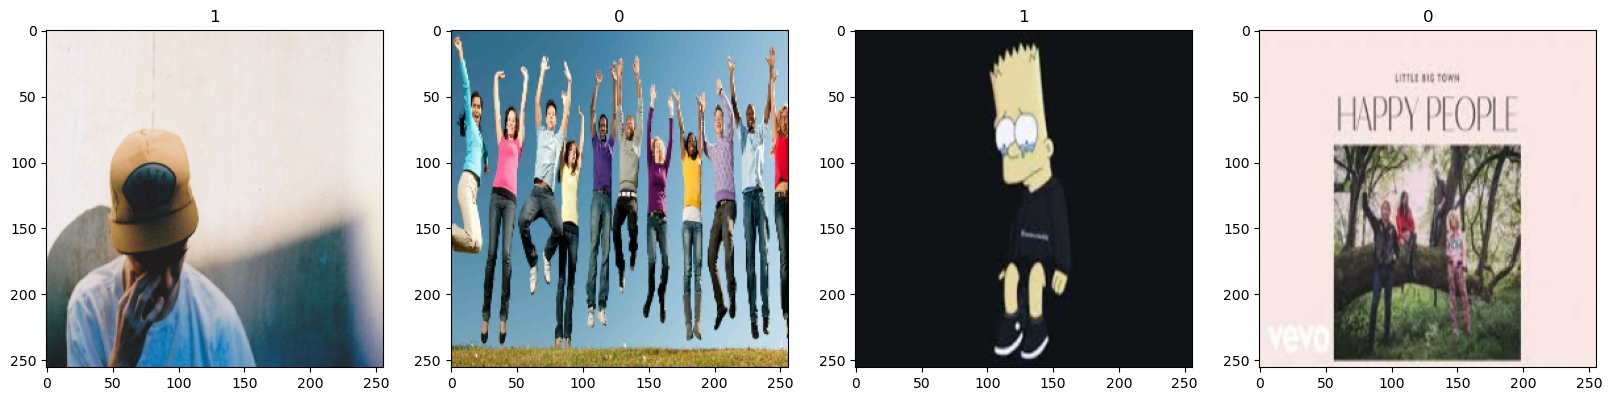

In [51]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for indx, img in enumerate(batch[0][:4]):
    ax[indx].imshow(img.astype(int)) #convert the img array elements from float to integer 
    ax[indx].title.set_text(batch[1][indx])

## 4. Pre-Processing 

#### 4.1 Data Scaling 

In [73]:
data = data.map(lambda x,y : (x/255, y))

In [75]:
scaled_iterator = data.as_numpy_iterator()

In [77]:
scaled = scaled_iterator.next()

fruits = ['apple', 'banana', 'cherry']
for index, fruit in enumerate(fruits):
    print(index, fruit)
prints : 
0 apple
1 banana
2 cherry


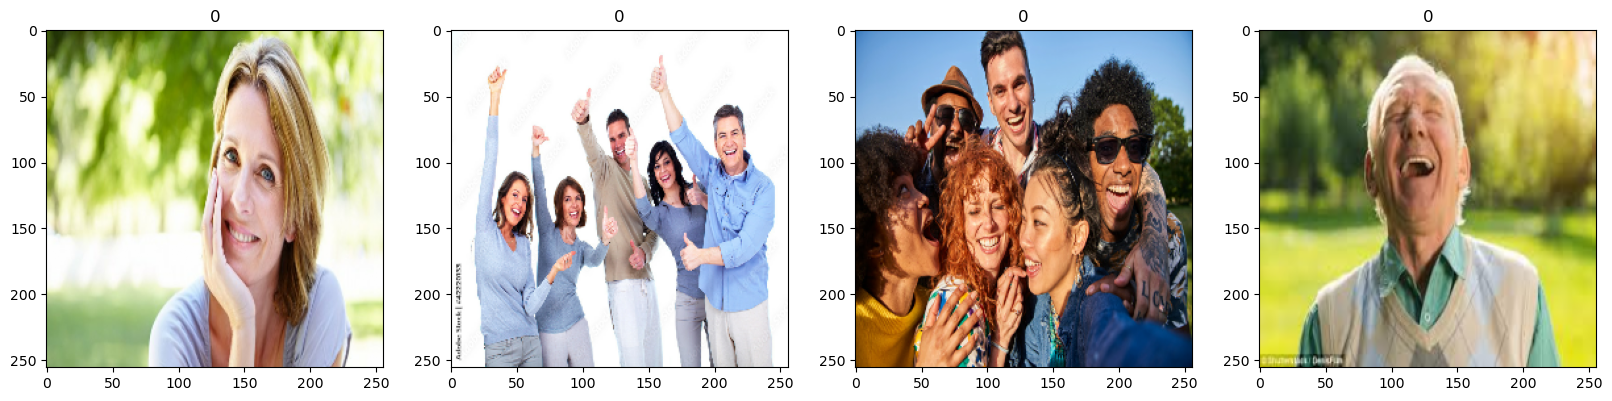

In [79]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for indx, img in enumerate(scaled[0][:4]):
    ax[indx].imshow(img) 
    ax[indx].title.set_text(scaled[1][indx])

#### 4.2 Data Splitting 

In [83]:
train_size  = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [85]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size  +val_size).take(test_size)

## 5. Deep Model 

#### 5.1. Model Building

In [140]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten

In [142]:
model = Sequential()

In [ ]:
Conv2D?? # the default padding is valid ( No padding ) -> Chack notion to understand more 
         # a stride is a pixel size by default -> you can change it to how many pixels you want . 

In [144]:
#Conv2D(16,(3,3),1) -> 16 filters(kernels) , kernel matrix is 3x3 , the matrix moves to the right by 1 pixel 
#Activation='relu' -> google the relu function -> it takes all negative values and turns them to 0 and leaves positive ones untouched . U can also check sigmoid activation 
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) # -> layer 1 (after input layer ) 
model.add(MaxPooling2D()) # -> layer 2 (the pool size if by default 2x2 ) 

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu')) #256neurons as an output -> a 1D vector of 256 values 
model.add(Dense(1, activation='sigmoid')) #1 neuron as an output  . Sigmoid returns either 0(for happy) or 1(for sad ) 

In [156]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy']) #compile is used to configure model for training , adam is an optimzer 
                                                                                #Binary Crossentropy is used for binary classification tasks 

In [158]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

#### 5.2. Model Training 

In [161]:
logdir = 'logs'

In [163]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= 'logdir')

In [165]:
hist = model.fit(train, epochs=20 , validation_data = val , callbacks=[tensorboard_callback]) #callback function s a func that can be called at any time during the process

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 291ms/step - accuracy: 0.5145 - loss: 0.8880 - val_accuracy: 0.7812 - val_loss: 0.5632
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 286ms/step - accuracy: 0.6283 - loss: 0.6266 - val_accuracy: 0.9062 - val_loss: 0.5602
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 304ms/step - accuracy: 0.8426 - loss: 0.5560 - val_accuracy: 0.8594 - val_loss: 0.4609
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 305ms/step - accuracy: 0.7864 - loss: 0.5125 - val_accuracy: 0.8594 - val_loss: 0.4153
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 312ms/step - accuracy: 0.8479 - loss: 0.4034 - val_accuracy: 0.9219 - val_loss: 0.2787
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - accuracy: 0.9386 - loss: 0.2933 - val_accuracy: 0.9062 - val_loss: 0.3227
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 295ms/step - accuracy: 0.9287 - loss: 0.2651 - val_accuracy: 0.9531 - val_loss: 0.2137
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 0.9197 - loss: 0.2225 - val_accuracy: 0.9219 - val_loss:

In [167]:
hist.history

{'accuracy': [0.5446428656578064,
  0.6294642686843872,
  0.8169642686843872,
  0.7901785969734192,
  0.8571428656578064,
  0.9196428656578064,
  0.9196428656578064,
  0.9285714030265808,
  0.9598214030265808,
  0.9241071343421936,
  0.9821428656578064,
  0.9910714030265808,
  0.9821428656578064,
  0.9955357313156128,
  0.9955357313156128,
  0.9910714030265808,
  0.9910714030265808,
  0.9955357313156128,
  0.9910714030265808,
  1.0],
 'loss': [0.8107047080993652,
  0.6155739426612854,
  0.5318983793258667,
  0.48917943239212036,
  0.3917962908744812,
  0.30504122376441956,
  0.2656579911708832,
  0.195813849568367,
  0.1370757818222046,
  0.1658433973789215,
  0.08514387160539627,
  0.06866107136011124,
  0.04710283502936363,
  0.02260558493435383,
  0.029500868171453476,
  0.020472969859838486,
  0.03169360011816025,
  0.01699202135205269,
  0.014116288162767887,
  0.0039869691245257854],
 'val_accuracy': [0.78125,
  0.90625,
  0.859375,
  0.859375,
  0.921875,
  0.90625,
  0.953125,


#### 5.3. Plot Performance 

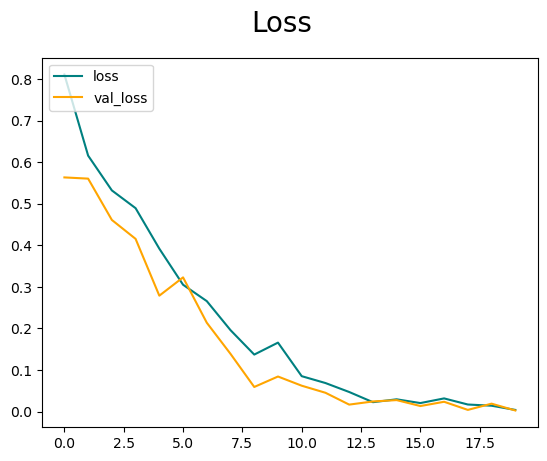

In [170]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

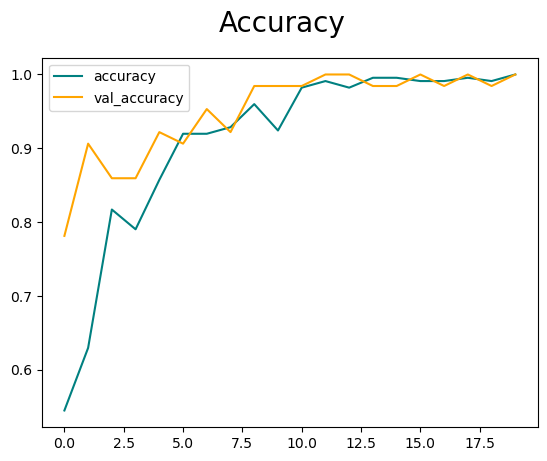

In [173]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [176]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [178]:
pre = Precision()

In [180]:
re = Recall()

In [182]:
acc = BinaryAccuracy() 

In [196]:
for batch in test.as_numpy_iterator() : 
    x,y = batch 
    y_prediction = model.predict(x) # predict the label of the x (image ) 
    pre.update_state(y,y_prediction) 
    re.update_state(y,y_prediction) 
    acc.update_state(y,y_prediction) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [200]:
print(pre.result().numpy() , re.result().numpy() , acc.result().numpy() )

1.0 1.0 1.0


In [217]:
#If you want to test the model on a single image rather than a batch : 
image = img = cv2.imread('154006829.jpg')
resize = tf.image.resize(img, (256,256))
y_predict = model.predict(np.expand_dims(resize/255,0)) #-> adds a new dimension(axis) on the point axis= 0 . Ex : input [1,2,3] -> output [[1,2,3]]
print(y_predict.shape) #-> the shape is (batch_size, height, width, channels)
if y_predict > 0.5 : 
    print("sad class image")
else : 
    print("happy class image")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
(1, 1)
happy class image


## 6. Saving the Model 

In [229]:
model.save(os.path.join('models','imageclassifier.keras'))

In [231]:
model.save(os.path.join('models','imageclassifier.h5'))

## 7. Loading the Model 

In [235]:
from tensorflow.keras.models import load_model

In [237]:
model2 = load_model(os.path.join('models','imageclassifier.h5'))

In [244]:
y_predict_new = model2.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [246]:
if y_predict_new > 0.5 : 
    print("sad class image")
else : 
    print("happy class image")

happy class image


## The END 